In [16]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import os
import rasterio as rio
import arcpy
import seaborn as sns
import os, glob
from tifffile import imsave
import cv2
#import gdal
from osgeo import gdal
import os, arcpy
from arcpy import env
from rasterstats import zonal_stats
%matplotlib inline

path = os.getcwd()
rootpath = 'c:\\Users\\Gamelab\\Desktop\\RT\\Resilience_Lab\\MRA_COMPILED_2\\'



In [17]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import os
import rasterio as rio
#import arcpy
import seaborn as sns
import os, glob
from tifffile import imsave
import cv2
#import gdal
from osgeo import gdal
import rasterio
import math
from rasterio.mask import mask
from shapely.geometry import mapping
import geopandas as gpd

In [18]:
path='D:\scriptie_data'
os.chdir(path)

In [11]:
df=gpd.read_file(r'MMR_Area_and_SubBasins\HECHMSTrial3_Subbasin_Boundaries_WGS84_V2.shp')

<AxesSubplot:>

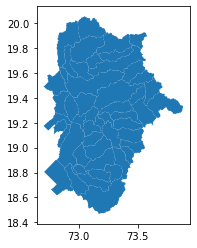

In [12]:
fig, ax = plt.subplots(1, 1)
df.plot(ax=ax, legend=True)

In [16]:
def func1(inputFolder,outputFolder):
    input_Folder = inputFolder
    #env.workspace = inputFolder
    output_Folder = outputFolder
    for file in os.listdir(input_Folder):
        inputPath = os.path.join(input_Folder, file)
        outputPath = os.path.join(output_Folder, file)
        arcpy.management.Clip(inputPath, "72.7001305028848 18.4679452082344 73.8880056002087 20.0542688581043", outputPath, r'MMR_Area_and_SubBasins\HECHMSTrial3_Subbasin_Boundaries_WGS84_V2.shp', "-1", "NONE", "NO_MAINTAIN_EXTENT")

In [ ]:
func1(r'2001',r'2001_2')
func1(r'2002',r'2002_2')
func1(r'2003',r'2003_2')
func1(r'2004',r'2004_2')
func1(r'2005',r'2005_2')
func1(r'2006',r'2006_2')
func1(r'2007',r'2007_2')
func1(r'2008',r'2008_2')
func1(r'2009',r'2009_2')
func1(r'2010',r'2010_2')
func1(r'2011',r'2011_2')
func1(r'2012',r'2012_2')
func1(r'2013',r'2013_2')
func1(r'2014',r'2014_2')
func1(r'2015',r'2015_2')
func1(r'2016',r'2016_2')
func1(r'2017',r'2017_2')
func1(r'2018',r'2018_2')
func1(r'2019',r'2019_2')
func1(r'2020',r'2020_2')
func1(r'2021',r'2021_2')

In [25]:

#inputFolder = r'EU_data\mmr_2\rainfall_data\2001_2'
#env.workspace = inputFolder

# Output Folder
#outputFolder = r'EU_data\mmr_2\rainfall_data\2001_3'

def func2(inputFolder,outputFolder):
    input_Folder = inputFolder
    #env.workspace = inputFolder
    output_Folder = outputFolder
    for file in os.listdir(input_Folder):
         if file.endswith('.tif'):
            file_path=os.path.join(input_Folder, file)
            with rio.open(file_path) as dem_src:
                rainfall_data = dem_src.read(1)
            #rainfall_data = cv2.imread(file_path ,0)
            rainfall=gdal.Open(file_path)
            projection = rainfall.GetProjection()
            geotransform = rainfall.GetGeoTransform()
            rainfall_data=np.multiply(rainfall_data,0.1*24)
    
            outputPath = os.path.join(output_Folder, file)
            cv2.imwrite(outputPath, rainfall_data)
            dataset2 = gdal.Open(outputPath, gdal.GA_Update)
            dataset2.SetGeoTransform(geotransform)
            dataset2.SetProjection(projection)

In [27]:
func2(r'2001_2',r'2001_3')
func2(r'2002_2',r'2002_3')
func2(r'2003_2',r'2003_3')
func2(r'2004_2',r'2004_3')
func2(r'2005_2',r'2005_3')
func2(r'2006_2',r'2006_3')
func2(r'2007_2',r'2007_3')
func2(r'2008_2',r'2008_3')
func2(r'2009_2',r'2009_3')
func2(r'2010_2',r'2010_3')
func2(r'2011_2',r'2011_3')
func2(r'2012_2',r'2012_3')
func2(r'2013_2',r'2013_3')
func2(r'2014_2',r'2014_3')
func2(r'2015_2',r'2015_3')
func2(r'2016_2',r'2016_3')
func2(r'2017_2',r'2017_3')
func2(r'2018_2',r'2018_3')
func2(r'2019_2',r'2019_3')
func2(r'2020_2',r'2020_3')
func2(r'2021_2',r'2021_3')

In [12]:
shapefile = gpd.read_file(r'MMR_Area_and_SubBasins\HECHMSTrial3_Subbasin_Boundaries_WGS84_V2.shp')
gdf2=pd.DataFrame()
gdf2['name']=shapefile['name']

In [27]:
def func_trial(inputFolder,outputFolder,naming):
    shapefile = gpd.read_file(r'MMR_Area_and_SubBasins\HECHMSTrial3_Subbasin_Boundaries_WGS84_V2.shp')
    input_Folder = inputFolder
    #env.workspace = inputFolder
    output_Folder = outputFolder
    geoms = shapefile.geometry.values # list of shapely geometries
    gdf2=pd.DataFrame()
    gdf2['name']=shapefile['name']
    ies=[0,13,17,38,42]
    for file in  os.listdir(inputFolder):
        if file.endswith('tif'):
            file_path=os.path.join(inputFolder, file)
            with rasterio.open(file_path) as src:
                affine = src.transform
                array = src.read(1)
                df_zonal_stats = pd.DataFrame(zonal_stats(geoms, array, affine=affine))
            for i in ies:
                geoms2=geoms[i]
                df_zonal_stats.iloc[i]=zonal_stats(geoms2, array, affine=affine,all_touched=True)[0]
            gdf2 = pd.concat([gdf2, df_zonal_stats['mean']], axis=1) 
            parts = file.split("ERG.")
            parts2=parts[1].split("-S")
            gdf2 = gdf2.rename({'mean':parts2[0]},axis=1)
    gdf2=gdf2.set_index('name')
    out_filename = naming + ".csv"    
    outputPath = os.path.join(output_Folder, out_filename)
    gdf2.to_csv(outputPath) 

In [28]:
func_trial(r'2001_3',r'rainfall_data','2001')
func_trial(r'2002_3',r'rainfall_data','2002')
func_trial(r'2003_3',r'rainfall_data','2003')
func_trial(r'2004_3',r'rainfall_data','2004')
func_trial(r'2005_3',r'rainfall_data','2005')
func_trial(r'2006_3',r'rainfall_data','2006')
func_trial(r'2007_3',r'rainfall_data','2007')
func_trial(r'2008_3',r'rainfall_data','2008')
func_trial(r'2009_3',r'rainfall_data','2009')
func_trial(r'2010_3',r'rainfall_data','2010')
func_trial(r'2011_3',r'rainfall_data','2011')
func_trial(r'2012_3',r'rainfall_data','2012')
func_trial(r'2013_3',r'rainfall_data','2013')
func_trial(r'2014_3',r'rainfall_data','2014')
func_trial(r'2015_3',r'rainfall_data','2015')
func_trial(r'2016_3',r'rainfall_data','2016')
func_trial(r'2017_3',r'rainfall_data','2017')
func_trial(r'2018_3',r'rainfall_data','2018')
func_trial(r'2019_3',r'rainfall_data','2019')
func_trial(r'2020_3',r'rainfall_data','2020')
func_trial(r'2021_3',r'rainfall_data','2021')

In [48]:
def func_trial_MMR(inputFolder,outputFolder,naming):
    shapefile = gpd.read_file(r'MMR_Area_and_SubBasins\MMR_Area_Boundary_WGS84.shp')
    input_Folder = inputFolder
    #env.workspace = inputFolder
    output_Folder = outputFolder
    geoms = shapefile.geometry.values # list of shapely geometries
    gdf2=pd.DataFrame()
    gdf2['name']=['MMR']
    for file in  os.listdir(inputFolder):
        if file.endswith('tif'):
            file_path=os.path.join(inputFolder, file)
            with rasterio.open(file_path) as src:
                affine = src.transform
                array = src.read(1)
                df_zonal_stats = pd.DataFrame(zonal_stats(geoms, array, affine=affine,all_touched=True))
            gdf2 = pd.concat([gdf2, df_zonal_stats['mean']], axis=1) 
            parts = file.split("ERG.")
            parts2=parts[1].split("-S")
            gdf2 = gdf2.rename({'mean':parts2[0]},axis=1)
    gdf2=gdf2.set_index('name')
    out_filename = naming + ".csv"    
    outputPath = os.path.join(output_Folder, out_filename)
    gdf2.to_csv(outputPath) 

In [49]:
func_trial_MMR(r'2001_3',r'rainfall_data_MMR','2001')
func_trial_MMR(r'2002_3',r'rainfall_data_MMR','2002')
func_trial_MMR(r'2003_3',r'rainfall_data_MMR','2003')
func_trial_MMR(r'2004_3',r'rainfall_data_MMR','2004')
func_trial_MMR(r'2005_3',r'rainfall_data_MMR','2005')
func_trial_MMR(r'2006_3',r'rainfall_data_MMR','2006')
func_trial_MMR(r'2007_3',r'rainfall_data_MMR','2007')
func_trial_MMR(r'2008_3',r'rainfall_data_MMR','2008')
func_trial_MMR(r'2009_3',r'rainfall_data_MMR','2009')
func_trial_MMR(r'2010_3',r'rainfall_data_MMR','2010')
func_trial_MMR(r'2011_3',r'rainfall_data_MMR','2011')
func_trial_MMR(r'2012_3',r'rainfall_data_MMR','2012')
func_trial_MMR(r'2013_3',r'rainfall_data_MMR','2013')
func_trial_MMR(r'2014_3',r'rainfall_data_MMR','2014')
func_trial_MMR(r'2015_3',r'rainfall_data_MMR','2015')
func_trial_MMR(r'2016_3',r'rainfall_data_MMR','2016')
func_trial_MMR(r'2017_3',r'rainfall_data_MMR','2017')
func_trial_MMR(r'2018_3',r'rainfall_data_MMR','2018')
func_trial_MMR(r'2019_3',r'rainfall_data_MMR','2019')
func_trial_MMR(r'2020_3',r'rainfall_data_MMR','2020')
func_trial_MMR(r'2021_3',r'rainfall_data_MMR','2021')

C:\Users\Quint\anaconda3\envs\gds\envs\myenv\lib\site-packages\rasterstats\io.py:313: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")


In [50]:
#combine MMR and subbasin data, create total files
def func_combineren(inputFolder1,inputFolder2,outputFolder):
    for file in  os.listdir(inputFolder1):
            file_path1=os.path.join(inputFolder1, file)
            file_path2=os.path.join(inputFolder2, file)
            df1 = pd.read_csv(file_path1,index_col='name')
            df2 = pd.read_csv(file_path2,index_col='name')
            df3 = pd.concat([df1, df2], axis=0) 
            outputPath=os.path.join(outputFolder, file)
            df3.to_csv(outputPath)
            df3=pd.DataFrame()

In [51]:
func_combineren(r'rainfall_data',r'rainfall_data_MMR',r'rainfall_data_total')

In [5]:
def func3(inputFolder,outputFolder):
    shapefile = gpd.read_file(r'MMR_Area_and_SubBasins\HECHMSTrial3_Subbasin_Boundaries_WGS84_V2.shp')
    input_Folder = inputFolder
    #env.workspace = inputFolder
    output_Folder = outputFolder
    geoms = shapefile.geometry.values # list of shapely geometries
    ies=[0,13,17,38,42]
    for file in  os.listdir(inputFolder):
        if file.endswith('tif'):
            file_path=os.path.join(inputFolder, file)
            with rasterio.open(file_path) as src:
                affine = src.transform
                array = src.read(1)
                df_zonal_stats = pd.DataFrame(zonal_stats(geoms, array, affine=affine))
            for i in ies:
                geoms2=geoms[i]
                df_zonal_stats.iloc[i]=zonal_stats(geoms2, array, affine=affine,all_touched=True)[0]
            gdf2 = pd.concat([shapefile, df_zonal_stats], axis=1) 
            parts = file.split("ERG.")
            parts2=parts[1].split("-S")
            out_filename = parts2[0] + ".shp"    
            outputPath = os.path.join(output_Folder, out_filename)
            gdf2.to_file(outputPath) 

In [9]:
def func32(inputFolder,outputFolder):
    shapefile = gpd.read_file(r'MMR_Area_and_SubBasins\MMR_Area_Boundary_WGS84.shp')
    input_Folder = inputFolder
    #env.workspace = inputFolder
    output_Folder = outputFolder
    geoms = shapefile.geometry.values # list of shapely geometries
    for file in  os.listdir(inputFolder):
        if file.endswith('tif'):
            file_path=os.path.join(inputFolder, file)
            with rasterio.open(file_path) as src:
                affine = src.transform
                array = src.read(1)
                df_zonal_stats = pd.DataFrame(zonal_stats(geoms, array, affine=affine))
            gdf2 = pd.concat([shapefile, df_zonal_stats], axis=1) 
            parts = file.split("ERG.")
            parts2=parts[1].split("-S")
            out_filename = parts2[0] + ".shp"    
            outputPath = os.path.join(output_Folder, out_filename)
            gdf2.to_file(outputPath) 

In [11]:
func32(r'2001_3',r'2001_42')
func32(r'2002_3',r'2002_42')
func32(r'2003_3',r'2003_42')
func32(r'2004_3',r'2004_42')
func32(r'2005_3',r'2005_42')
func32(r'2006_3',r'2006_42')
func32(r'2007_3',r'2007_42')
func32(r'2008_3',r'2008_42')
func32(r'2009_3',r'2009_42')
func32(r'2010_3',r'2010_42')

In [12]:
func32(r'2011_3',r'2011_42')
func32(r'2012_3',r'2012_42')
func32(r'2013_3',r'2013_42')
func32(r'2014_3',r'2014_42')
func32(r'2015_3',r'2015_42')
func32(r'2016_3',r'2016_42')
func32(r'2017_3',r'2017_42')
func32(r'2018_3',r'2018_42')
func32(r'2019_3',r'2019_42')
func32(r'2020_3',r'2020_42')
func32(r'2021_3',r'2021_42')

In [104]:
func3(r'2001_3',r'2001_4')

In [ ]:
func3(r'2002_3',r'2002_4')
func3(r'2003_3',r'2003_4')
func3(r'2004_3',r'2004_4')
func3(r'2005_3',r'2005_4')
func3(r'2006_3',r'2006_4')
func3(r'2007_3',r'2007_4')
func3(r'2008_3',r'2008_4')

In [111]:
func3(r'2009_3',r'2009_4')
func3(r'2010_3',r'2010_4')


KeyboardInterrupt: 

In [6]:
#for file in  os.listdir(inputFolder):
inputFolder=r'2001_4'
def func4(inputFolder, year):
    df= pd.DataFrame()
    for file in  os.listdir(inputFolder):
        if file.endswith('shp'):
            file_path=os.path.join(inputFolder, file)
            a=gpd.read_file(file_path)
            df[file]=a['mean']
    df2=pd.DataFrame()
    df3=pd.DataFrame()
    df2['date']=df.idxmax(axis=1)
    df3['rainfall']=df.max(axis=1)
    c=pd.concat([a['name'],df2,df3],axis=1)
    c['date'] = c['date'].str.replace('.shp', '')
    c.loc[51]=['MMR',c.max()['date'],c['rainfall'].max()]
    outputPath = os.path.join(r'maximum', year)
    c.to_csv(outputPath, index = False)

In [17]:
#for file in  os.listdir(inputFolder):
def func4_2(inputFolder,year,csvfile):
    df= pd.DataFrame()
    csvpath=os.path.join(r'maximum',csvfile)
    csv = pd.read_csv(csvpath, delimiter=',')
    for file in  os.listdir(inputFolder):
        if file.endswith('shp'):
            file_path=os.path.join(inputFolder, file)
            a=gpd.read_file(file_path)
            df[file]=a['mean']
    df2=pd.DataFrame()
    df3=pd.DataFrame()
    df2['date']=df.idxmax(axis=1)
    df3['rainfall']=df.max(axis=1)
    c=pd.concat([a['name'],df2,df3],axis=1)
    c['date'] = c['date'].str.replace('.shp', '')
    csv.loc[51]=['MMR',c.max()['date'],c['rainfall'].max()]
    outputPath = os.path.join(r'maximum', year)
    csv.to_csv(outputPath, index = False)

In [20]:
func4_2(r'2001_42','2001_2.csv','2001.csv')
func4_2(r'2002_42','2002_2.csv','2002.csv')
func4_2(r'2003_42','2003_2.csv','2003.csv')
func4_2(r'2004_42','2004_2.csv','2004.csv')
func4_2(r'2005_42','2005_2.csv','2005.csv')
func4_2(r'2006_42','2006_2.csv','2006.csv')
func4_2(r'2007_42','2007_2.csv','2007.csv')
func4_2(r'2008_42','2008_2.csv','2008.csv')
func4_2(r'2009_42','2009_2.csv','2009.csv')
func4_2(r'2010_42','2010_2.csv','2010.csv')
func4_2(r'2011_42','2011_2.csv','2011.csv')
func4_2(r'2012_42','2012_2.csv','2012.csv')
func4_2(r'2013_42','2013_2.csv','2013.csv')
func4_2(r'2014_42','2014_2.csv','2014.csv')
func4_2(r'2015_42','2015_2.csv','2015.csv')
func4_2(r'2016_42','2016_2.csv','2016.csv')
func4_2(r'2017_42','2017_2.csv','2017.csv')
func4_2(r'2018_42','2018_2.csv','2018.csv')
func4_2(r'2019_42','2019_2.csv','2019.csv')
func4_2(r'2020_42','2020_2.csv','2020.csv')
func4_2(r'2021_42','2021_2.csv','2021.csv')

<ipython-input-17-b52a64178910>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[file]=a['mean']
<ipython-input-17-b52a64178910>:16: FutureWarning: The default value of regex will change from True to False in a future version.
  c['date'] = c['date'].str.replace('.shp', '')


In [207]:
func4(r'2001_4','2001.csv')

<ipython-input-206-fdbe18e0bef3>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[file]=a['mean']
<ipython-input-206-fdbe18e0bef3>:15: FutureWarning: The default value of regex will change from True to False in a future version.
  c['date'] = c['date'].str.replace('.shp', '')


In [208]:
func4(r'2002_4','2002.csv')
func4(r'2003_4','2003.csv')
func4(r'2004_4','2004.csv')
func4(r'2005_4','2005.csv')
func4(r'2006_4','2006.csv')
func4(r'2007_4','2007.csv')
func4(r'2008_4','2008.csv')
func4(r'2009_4','2009.csv')
func4(r'2010_4','2010.csv')

<ipython-input-206-fdbe18e0bef3>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[file]=a['mean']
<ipython-input-206-fdbe18e0bef3>:15: FutureWarning: The default value of regex will change from True to False in a future version.
  c['date'] = c['date'].str.replace('.shp', '')


In [7]:
func3(r'2011_3',r'2011_4')
func4(r'2011_4','2011.csv')
func3(r'2012_3',r'2012_4')
func4(r'2012_4','2012.csv')
func3(r'2013_3',r'2013_4')
func4(r'2013_4','2013.csv')
func3(r'2014_3',r'2014_4')
func4(r'2014_4','2014.csv')
func3(r'2015_3',r'2015_4')
func4(r'2015_4','2015.csv')

C:\Users\Quint\anaconda3\envs\gds\envs\myenv\lib\site-packages\rasterstats\io.py:313: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
<ipython-input-6-fdbe18e0bef3>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[file]=a['mean']
<ipython-input-6-fdbe18e0bef3>:15: FutureWarning: The default value of regex will change from True to False in a future version.
  c['date'] = c['date'].str.replace('.shp', '')


In [8]:
func3(r'2016_3',r'2016_4')
func4(r'2016_4','2016.csv')
func3(r'2017_3',r'2017_4')
func4(r'2017_4','2017.csv')
func3(r'2018_3',r'2018_4')
func4(r'2018_4','2018.csv')
func3(r'2019_3',r'2019_4')
func4(r'2019_4','2019.csv')
func3(r'2020_3',r'2020_4')
func4(r'2020_4','2020.csv')
func3(r'2021_3',r'2021_4')
func4(r'2021_4','2021.csv')

<ipython-input-6-fdbe18e0bef3>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[file]=a['mean']
<ipython-input-6-fdbe18e0bef3>:15: FutureWarning: The default value of regex will change from True to False in a future version.
  c['date'] = c['date'].str.replace('.shp', '')


In [190]:
c

,name,date,rainfall
0,Subbasin-577,20010709.shp,256.200000
1,Subbasin-401,20010709.shp,314.400000
2,Subbasin-4,20010709.shp,309.600000
3,Subbasin-10,20010709.shp,235.200000
4,Subbasin-15,20010709.shp,230.400000
5,Subbasin-28,20010709.shp,331.200000
6,Subbasin-48,20010709.shp,291.600000
7,Subbasin-52,20010709.shp,88.800000
8,Subbasin-63,20010709.shp,288.000000
9,Subbasin-7,20010709.shp,230.400000


In [161]:
c.iloc[51]

IndexError: single positional indexer is out-of-bounds

In [98]:
from rasterstats import zonal_stats
shapefile = gpd.read_file(r'MMR_Area_and_SubBasins\HECHMSTrial3_Subbasin_Boundaries_WGS84_V2.shp')
geoms = shapefile.geometry.values # list of shapely geometries
rainfall_raster_folder=r'2001_3'
file=r'3B-DAY-GIS.MS.MRG.3IMERG.20010101-S000000-E235959.0000.V06B.tif'
file_path=os.path.join(rainfall_raster_folder, file)
#for i in range(len(geoms)):
with rasterio.open(file_path) as src:
    affine = src.transform
    array = src.read(1)
    df_zonal_stats = pd.DataFrame(zonal_stats(geoms, array, affine=affine))
ies=[0,13,17,38,42]
for i in ies:
    geoms2=geoms[i]
    df_zonal_stats.iloc[i]=zonal_stats(geoms2, array, affine=affine,all_touched=True)[0]
gdf2 = pd.concat([shapefile, df_zonal_stats], axis=1) 

C:\Users\Quint\anaconda3\envs\gds\envs\myenv\lib\site-packages\rasterstats\io.py:313: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")


In [99]:
df_zonal_stats

,count,min,max,mean
0,4,0.0,0.0,0.0
1,1,0.0,0.0,0.0
2,1,0.0,0.0,0.0
3,2,0.0,0.0,0.0
4,1,0.0,0.0,0.0
5,1,0.0,0.0,0.0
6,2,0.0,0.0,0.0
7,1,0.0,0.0,0.0
8,2,0.0,0.0,0.0
9,1,0.0,0.0,0.0


In [61]:
shapefile = gpd.read_file(r'MMR_Area_and_SubBasins\HECHMSTrial3_Subbasin_Boundaries_WGS84_V2.shp')
# extract the geometry in GeoJSON format
geoms = shapefile.geometry.values # list of shapely geometries
shapefile['avg_rain']=0
rainfall_raster_folder=r'2001_3'
rainfall_dailymean_subbasins_folder=r'2001_4'
for file in os.listdir(rainfall_raster_folder):
    if file.endswith('.tif'):
        file_path=os.path.join(rainfall_raster_folder, file)
        for i in range(len(geoms)):
            geoms2=[mapping(geoms[i])]
            with rasterio.open(file_path) as src:
                 out_image, out_transform = mask(src, geoms2, crop=True)
            out_image[out_image==0] = np.nan
            num_rows, num_cols = out_image[0].shape
          #  if i==0 or i==13 or i==17 or i==38 or i==42:
          #      with rasterio.open(file_path) as src:
           #         out_image, out_transform = mask(src, geoms2, crop=True, all_touched=True)
            shapefile.iloc[i,-1]=np.nanmean(out_image)
        parts = file.split("ERG.")
        parts2=parts[1].split("-S")
        out_filename = parts2[0] + ".shp"    
        outputPath = os.path.join(rainfall_dailymean_subbasins_folder, out_filename)
        #cv2.imwrite(outputPath, shapefile)
        shapefile.to_file(outputPath)  
        #dataset2 = gdal.Open(outputPath, gdal.GA_Update)
        #dataset2.SetGeoTransform(geotransform)
        #dataset2.SetProjection(projection)
            

<ipython-input-61-117eb3dc8b3c>:19: RuntimeWarning: Mean of empty slice
  shapefile.iloc[i,-1]=np.nanmean(out_image)


KeyboardInterrupt: 

In [ ]:
shapefile

In [59]:
from rasterstats import zonal_stats
shapefile = gpd.read_file(r'MMR_Area_and_SubBasins\HECHMSTrial3_Subbasin_Boundaries_WGS84_V2.shp')
# extract the geometry in GeoJSON format
geoms = shapefile.geometry.values # list of shapely geometries
rainfall_raster_folder=r'2001_3'
rainfall_dailymean_subbasins_folder=r'2001_4'
file=r'3B-DAY-GIS.MS.MRG.3IMERG.20010101-S000000-E235959.0000.V06B.tif'
if file.endswith('.tif'):
    file_path=os.path.join(rainfall_raster_folder, file)
    with rasterio.open(file_path) as src:
        affine = src.transform
        array = src.read(1)
    for i in range(len(geoms)):
        geoms2=[mapping(geoms[i])]
        if i==0 or i==13 or i==17 or i==38 or i==42:
            df_zonal_stats = pd.DataFrame(zonal_stats(geoms2, array, affine=affine, all_touched=True)) 
        else:
            df_zonal_stats = pd.DataFrame(zonal_stats(geoms2, array, affine=affine))

#    parts = file.split("ERG.")
#    parts2=parts[1].split("-S")
#    out_filename = parts2[0] + ".shp"    
#    outputPath = os.path.join(rainfall_dailymean_subbasins_folder, out_filename)
#        #cv2.imwrite(outputPath, shapefile)
        # adding statistics back to original GeoDataFrame
#    shapefile = pd.concat([shapefile, df_zonal_stats], axis=1) 
#    shapefile.to_file(outputPath)  


C:\Users\Quint\anaconda3\envs\gds\envs\myenv\lib\site-packages\rasterstats\io.py:313: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")


In [60]:
df_zonal_stats

,min,max,mean,count
0,0.0,0.0,0.0,4


In [45]:
shapefile = gpd.read_file(r'MMR_Area_and_SubBasins\HECHMSTrial3_Subbasin_Boundaries_WGS84_V2.shp')
# extract the geometry in GeoJSON format
geoms = shapefile.geometry.values # list of shapely geometries
shapefile['avg_rain']=0
rainfall_raster_folder=r'2001_3'
rainfall_dailymean_subbasins_folder=r'2001_4'
#for file in os.listdir(rainfall_raster_folder):
file=r'3B-DAY-GIS.MS.MRG.3IMERG.20010101-S000000-E235959.0000.V06B.tif'
if file.endswith('.tif'):
    file_path=os.path.join(rainfall_raster_folder, file)
    for i in range(len(geoms)):
        geoms2=[mapping(geoms[i])]
        with rasterio.open(file_path) as src:
            out_image, out_transform = mask(src, geoms2, crop=True)
        #print(out_image)
        out_image[out_image==0] = np.nan
        #print(out_image)
        num_rows, num_cols = out_image[0].shape
        if i==0 or i==13 or i==17 or i==38 or i==42:
            with rasterio.open(file_path) as src:
                out_image, out_transform = mask(src, geoms2, crop=True, all_touched=True)
    #print(np.count_nonzero(np.isnan(out_image)))
    #print(num_rows*num_cols)
    #print(out_image)
        shapefile.iloc[i,-1]=np.nanmean(out_image)
    parts = file.split("ERG.")
    parts2=parts[1].split("-S")
    out_filename = parts2[0] + ".shp"    
    outputPath = os.path.join(rainfall_dailymean_subbasins_folder, out_filename)
        #cv2.imwrite(outputPath, shapefile)
    shapefile.to_file(outputPath)  
        #dataset2 = gdal.Open(outputPath, gdal.GA_Update)
        #dataset2.SetGeoTransform(geotransform)
        #dataset2.SetProjection(projection)

[[[0. 0.]
  [0. 0.]]]
[[[nan nan]
  [nan nan]]]
[[[0. 0. 0.]
  [0. 0. 0.]]]
[[[nan nan nan]
  [nan nan nan]]]
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]
[[[nan nan nan]
  [nan nan nan]
  [nan nan nan]]]
[[[0. 0.]
  [0. 0.]]]
[[[nan nan]
  [nan nan]]]
[[[0. 0. 0.]
  [0. 0. 0.]]]
[[[nan nan nan]
  [nan nan nan]]]
[[[0. 0.]
  [0. 0.]
  [0. 0.]]]
[[[nan nan]
  [nan nan]
  [nan nan]]]
[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]
[[[nan nan nan nan]
  [nan nan nan nan]
  [nan nan nan nan]]]
[[[0. 0.]
  [0. 0.]
  [0. 0.]]]
[[[nan nan]
  [nan nan]
  [nan nan]]]
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]
[[[nan nan nan]
  [nan nan nan]
  [nan nan nan]]]
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]
[[[nan nan nan]
  [nan nan nan]
  [nan nan nan]]]
[[[0. 0. 0.]
  [0. 0. 0.]]]
[[[nan nan nan]
  [nan nan nan]]]


<ipython-input-45-b91877842480>:25: RuntimeWarning: Mean of empty slice
  shapefile.iloc[i,-1]=np.nanmean(out_image)


[[[0. 0.]
  [0. 0.]]]
[[[nan nan]
  [nan nan]]]
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]
[[[nan nan nan]
  [nan nan nan]
  [nan nan nan]
  [nan nan nan]]]
[[[0. 0. 0.]
  [0. 0. 0.]]]
[[[nan nan nan]
  [nan nan nan]]]
[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]
[[[nan nan nan nan]
  [nan nan nan nan]
  [nan nan nan nan]]]
[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]
[[[nan nan nan nan]
  [nan nan nan nan]
  [nan nan nan nan]]]
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]
[[[nan nan nan]
  [nan nan nan]
  [nan nan nan]
  [nan nan nan]
  [nan nan nan]]]
[[[0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]]]
[[[nan nan]
  [nan nan]
  [nan nan]
  [nan nan]]]
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]
[[[nan nan nan]
  [nan nan nan]
  [nan nan nan]]]
[[[0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]]]
[[[nan nan nan nan nan nan]
  [nan nan nan nan nan nan]
  [nan nan nan nan nan nan]
  [nan nan nan nan nan nan]]]
[[[0. 0. 0

In [44]:
shapefile

,name,centroid_x,centroid_y,area_sqkm,latitude,longitude,basinid,geometry,avg_rain
0,Subbasin-577,277091.069016,2.167460e+06,62.943594,19.589657,72.87488,680.0,"POLYGON ((72.86374 19.64807, 72.86410 19.64807...",0.0
1,Subbasin-401,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((72.84346 19.13468, 72.84335 19.13468...",NaN
2,Subbasin-4,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((72.82282 19.01498, 72.82270 19.01498...",NaN
3,Subbasin-10,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((73.25897 18.75366, 73.25908 18...",NaN
4,Subbasin-15,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((73.21199 18.73379, 73.21176 18...",NaN
5,Subbasin-28,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((73.34802 18.99389, 73.34825 18...",NaN
6,Subbasin-48,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((73.49595 19.26914, 73.49595 19...",NaN
7,Subbasin-52,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((73.53410 19.85140, 73.53411 19.85129...",NaN
8,Subbasin-63,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((73.57298 19.53222, 73.57298 19.53211...",NaN
9,Subbasin-7,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((73.56562 19.43470, 73.56610 19.43470...",NaN


In [37]:
inputFolder=r'2005_4'
df=pd.DataFrame()
for file in  os.listdir(inputFolder):
    if file.endswith('shp'):
        file_path=os.path.join(inputFolder, file)
        a=gpd.read_file(file_path)
        df['name']=a['name']
        df['mean']=a['mean']
        b=file.replace('.shp', '')
        df=df.rename(columns={'mean':b})
outputPath = os.path.join(r'2005_5', '2005_complete.csv')
df.to_csv(outputPath, index = False)

In [36]:
df['20050726']

0     182.400000
1     487.200000
2     451.200000
3     435.600000
4     328.800000
5     355.200000
6     160.800000
7      43.200000
8      43.200000
9      96.000000
10     31.200000
11    103.200000
12    477.600000
13    285.600000
14     25.200000
15     21.600000
16     53.760000
17     82.285714
18    136.000000
19     37.200000
20    317.600000
21    198.857143
22    410.400000
23    440.400000
24    379.200000
25    163.680000
26    196.000000
27    211.200000
28    321.600000
29    271.200000
30    379.200000
31    418.800000
32    499.200000
33    655.200000
34    481.200000
35    507.000000
36    472.800000
37    463.200000
38    347.400000
39    283.200000
40    265.200000
41    453.600000
42    388.320000
43     21.600000
44    127.200000
45    286.400000
46     98.400000
47    304.800000
48    216.400000
49     18.400000
50     25.200000
Name: 20050726, dtype: float64

In [19]:
a

'20050930'

In [21]:
df.rename(columns={'mean':a})

,name,20050930
0,Subbasin-577,0.0
1,Subbasin-401,0.0
2,Subbasin-4,0.0
3,Subbasin-10,0.0
4,Subbasin-15,0.0
5,Subbasin-28,0.0
6,Subbasin-48,0.0
7,Subbasin-52,0.0
8,Subbasin-63,0.0
9,Subbasin-7,0.0
